> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Predict heart disease

In this activity, you'll use a small [dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) provided by the Cleveland Clinic Foundation for Heart Disease. 

Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease.

Below is a description of each column.

|  Column  |                           Description                          |  Feature Type  | Data Type |
|:--------:|:--------------------------------------------------------------:|:--------------:|:---------:|
| Age      | Age in years                                                   | Numerical      | integer   |
| Sex      | (1 = male; 0 = female)                                         | Categorical    | integer   |
| CP       | Chest pain type (0, 1, 2, 3, 4)                                | Categorical    | integer   |
| Trestbpd | Resting blood pressure (in mm Hg on admission to the hospital) | Numerical      | integer   |
| Chol     | Serum cholestoral in mg/dl                                     | Numerical      | integer   |
| FBS      | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)        | Categorical    | integer   |
| RestECG  | Resting electrocardiographic results (0, 1, 2)                 | Categorical    | integer   |
| Thalach  | Maximum heart rate achieved                                    | Numerical      | integer   |
| Exang    | Exercise induced angina (1 = yes; 0 = no)                      | Categorical    | integer   |
| Oldpeak  | ST depression induced by exercise relative to rest             | Numerical      | float     |
| Slope    | The slope of the peak exercise ST segment                      | Numerical      | integer   |
| CA       | Number of major vessels (0-3) colored by flourosopy            | Numerical      | integer   |
| Thal     | 3 = normal; 6 = fixed defect; 7 = reversable defect            | Categorical    | string    |
| Target   | Diagnosis of heart disease (1 = true; 0 = false)               | Classification | integer   |

## Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Python version: 3.8.3


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

# You may add other imports here as needed
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

scikit-learn version: 0.23.1


## Step 1: loading the data

### Question

Load the dataset into a pandas DataFrame named `df_heart`.

In [4]:
csv_url = "https://raw.githubusercontent.com/bpesquet/mlkatas/master/_datasets/heart.csv"

#Load dataset
df_heart = pd.read_csv(csv_url)

In [5]:
print(f"df_heart: {df_heart.shape}")

assert df_heart.shape == (301, 14)

df_heart: (301, 14)


## Step 2: prepare the data

### Question

Use the following cells to discover data.

In [6]:
# Print info about the dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.0+ KB


In [7]:
# Print the first 10 data samples
df_heart.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


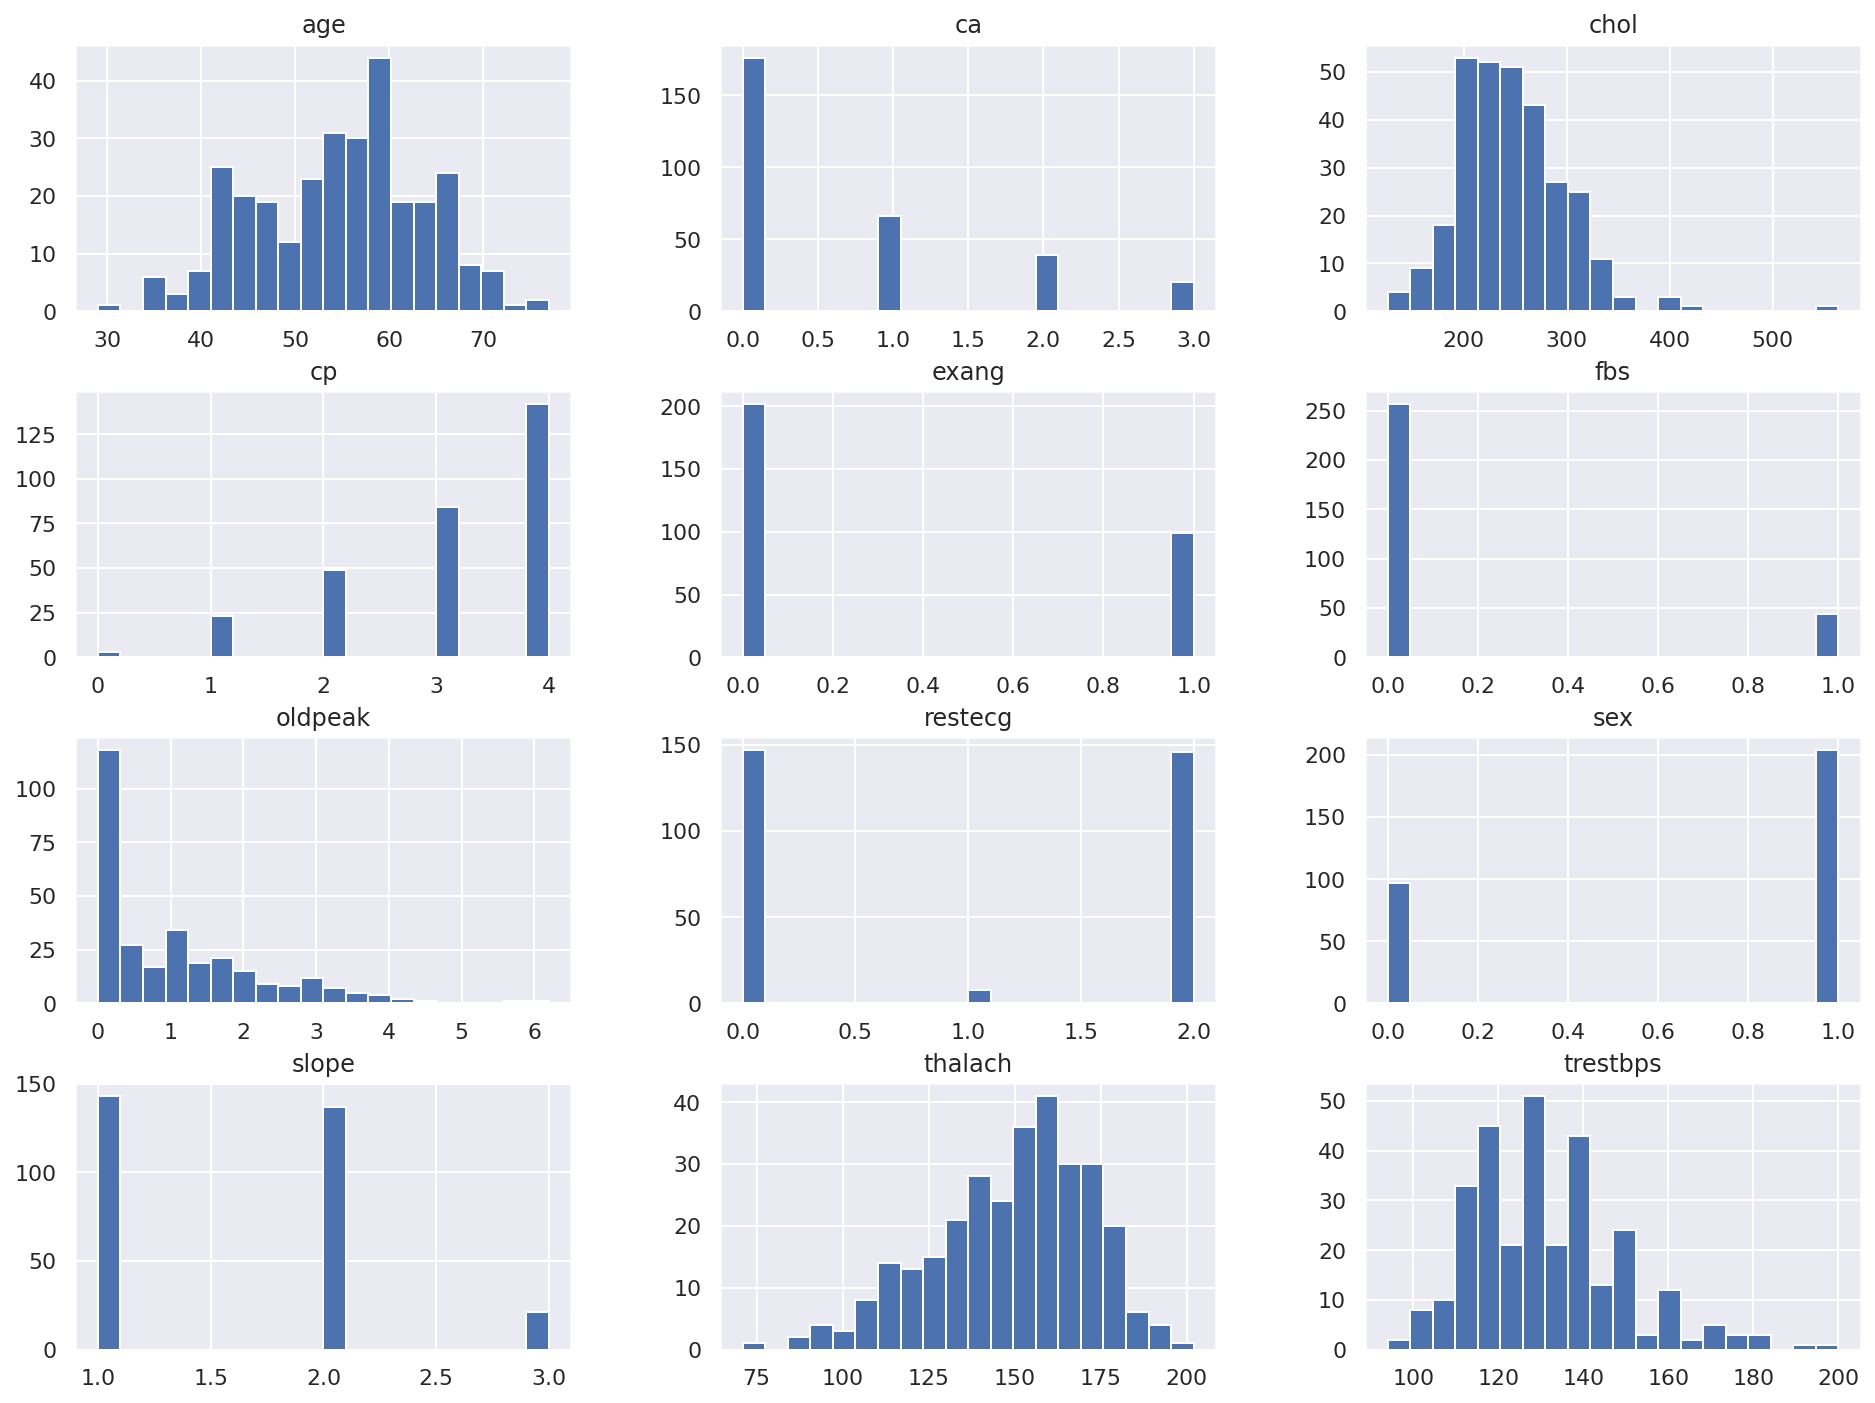

In [8]:
# # Print descriptive statistics for all numerical attributes

df_heart.hist(bins=20, figsize=(16, 12), column=[feature for feature in df_heart.keys() if feature != 'target'])
plt.show()

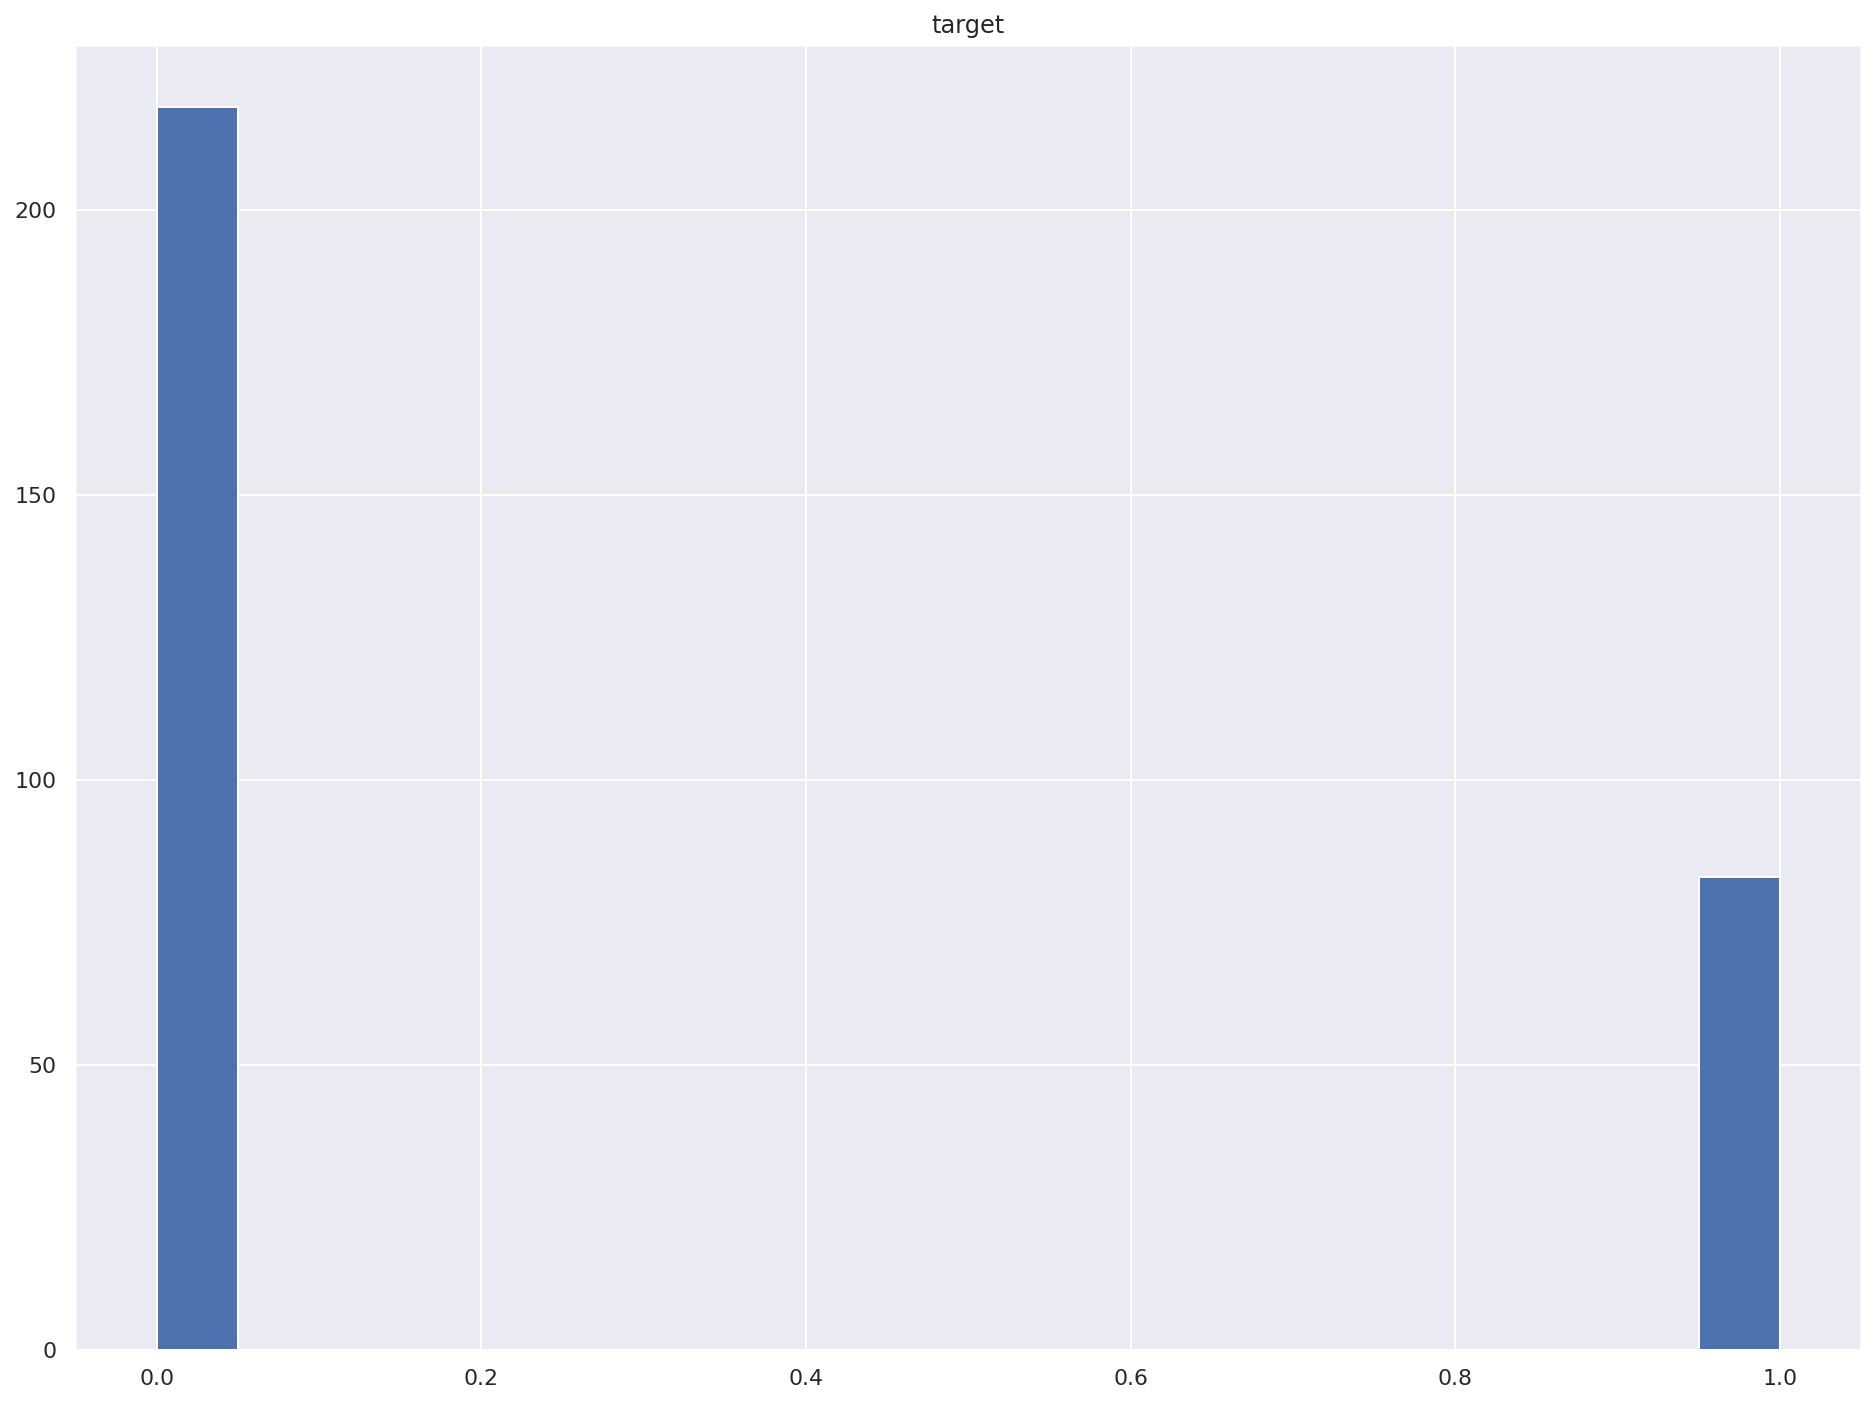

In [9]:
# Print distribution of target values

df_heart.hist(bins=20, figsize=(16, 12), column='target')
plt.show()

### Question

Use the following cells to prepare data for training:
- Split data between training and test sets with a 20% ratio.
- Store inputs and labels in the `x_train` and `y_train` variables.
- Preprocess training input data as needed.

In [10]:
# Split dataset between training and test

df_train, df_test = train_test_split(df_heart, test_size=0.2)

In [11]:
print(f"Training dataset: {df_train.shape}")
print(f"Test dataset: {df_test.shape}")

assert df_train.shape == (240, 14)
assert df_test.shape == (61, 14)

Training dataset: (240, 14)
Test dataset: (61, 14)


In [12]:
# Split training dataset between inputs and target

df_x_train = df_train.drop('target', axis=1)
y_train = df_train['target']

In [13]:
print(f"Training data: {df_x_train.shape}")
print(f"Training labels: {y_train.shape}")

assert df_x_train.shape == (240, 13)
assert y_train.shape == (240,)

Training data: (240, 13)
Training labels: (240,)


In [14]:
# Print numerical and categorical features
nc_features = df_x_train.select_dtypes(include=[np.number, np.object]).columns
print(nc_features)

# Print all values for the "thal" feature
df_x_train['thal'].value_counts()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


normal        135
reversible     90
fixed          15
Name: thal, dtype: int64

In [15]:
# Check for missing values
total = df_x_train.isnull().sum().sort_values(ascending=False)
percent = (df_x_train.isnull().sum() * 100 / df_x_train.isnull().count()).sort_values(
    ascending=False
)
df_missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
df_missing_data.head()

,Total,Percent
thal,0,0.0
ca,0,0.0
slope,0,0.0
oldpeak,0,0.0
exang,0,0.0


In [16]:
# Use pipelines to preprocess data

num_features = df_x_train.select_dtypes(include=[np.number]).columns
cat_features = df_x_train.select_dtypes(include=[np.object]).columns

#Pipeline for numerical values = rescaling
num_pipeline = Pipeline([("std_scaler", StandardScaler())])

#Full pipeline calling previous one + one hot encoding categorical features
full_pipeline = ColumnTransformer(
    [("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)]
)

#Apply pipeline on training datas
x_train = full_pipeline.fit_transform(df_x_train)

In [17]:
# Print preprocessed data shape and first sample
print(f"x_train: {x_train.shape}")
print(x_train[0])

assert x_train.shape == (240, 15)

x_train: (240, 15)
[ 0.33999751 -1.4010578  -0.19558748 -0.6615926   1.74041194 -0.3992747
 -1.01914821  1.01010844 -0.68730826 -0.91367045 -0.95082019 -0.73212525
  0.          1.          0.        ]


## Step 3: train and evaluate a model

### Question

Use the following cells to:
- Train a SGD classifier on the training data.
- Evaluate its accuracy using K-fold cross-validation.
- Compute the precision, recall and f1-score metrics.
- Plot its confusion matrix and ROC curve.

In [18]:
# Fit a SGD classifier to the training set

model = SGDClassifier(loss="log")
model.fit(x_train, y_train)

SGDClassifier(loss='log')

In [31]:
# Use cross-validation to evaluate accuracy, using 3 folds
# Store the result in the cv_acc variable

results = cross_val_score(model, x_train, y_train, cv=3, scoring="accuracy")
print(results)
cv_acc = results.mean()

[0.7875 0.9    0.8125]


In [32]:
print(f"CV accuracy: {cv_acc}")

assert np.mean(cv_acc) > 0.70

CV accuracy: 0.8333333333333334


In [33]:
# Plot the confusion matrix for a model and a dataset
def plot_conf_mat(model, x, y):
    with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
        display = plot_confusion_matrix(
            model, x, y, values_format="d", cmap=plt.cm.Blues
        )

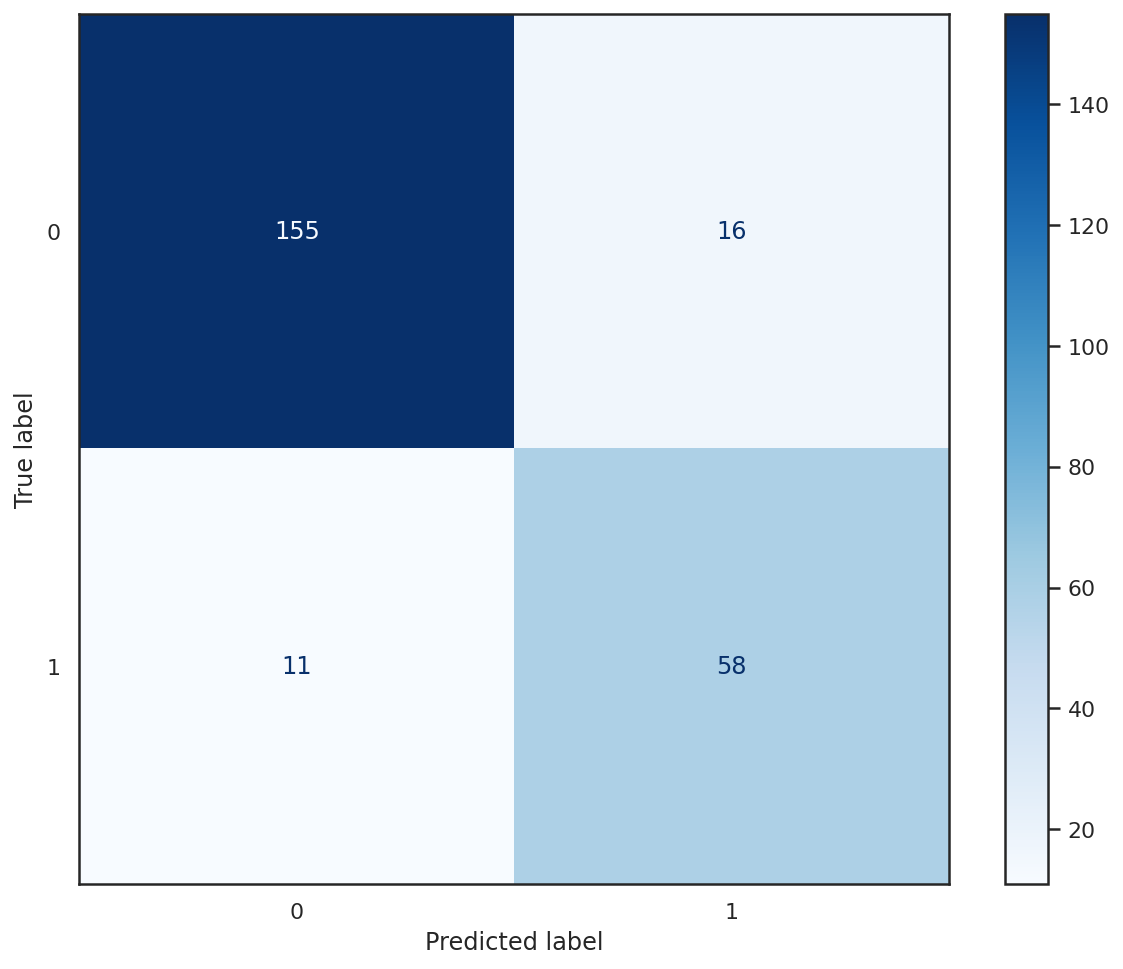

In [34]:
# Plot confusion matrix for the SGD classifier

plot_conf_mat(model, x_train, y_train)

In [23]:
# Compute precision, recall and f1-score for the SGD classifier

print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       171
           1       0.78      0.84      0.81        69

    accuracy                           0.89       240
   macro avg       0.86      0.87      0.87       240
weighted avg       0.89      0.89      0.89       240



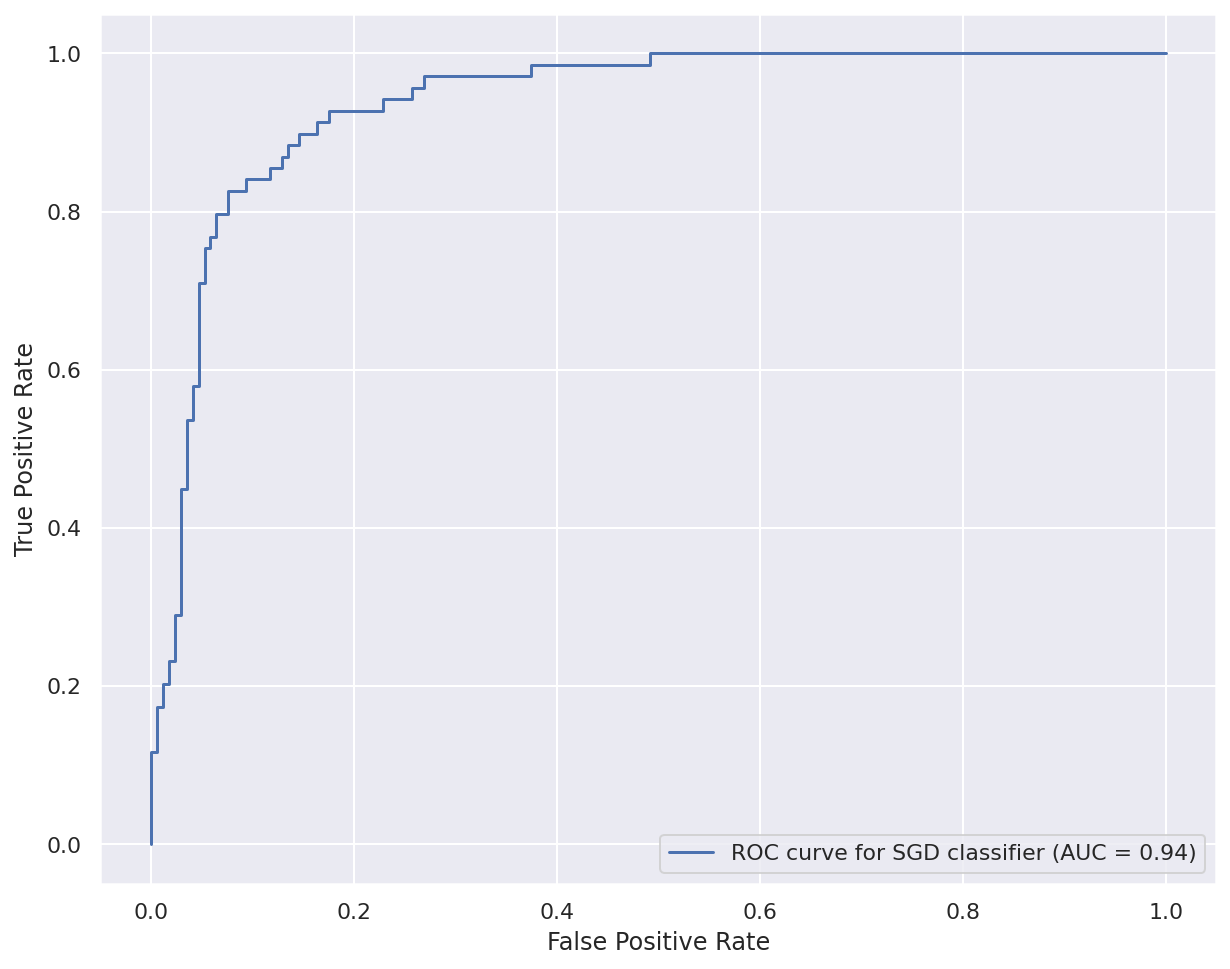

In [24]:
sgd_curve = plot_roc_curve(model, x_train, y_train, name="ROC curve for SGD classifier")

## Bonus

Train another classifier and plot ROC curves for both.

In [25]:
#Logistic regression model training
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [26]:
#Cross validation
results = cross_val_score(lr_model, x_train, y_train, cv=3)
print(results)

cv_acc = results.mean()
print(f"CV accuracy: {cv_acc}")
assert np.mean(cv_acc) > 0.70

[0.85  0.875 0.825]
CV accuracy: 0.85


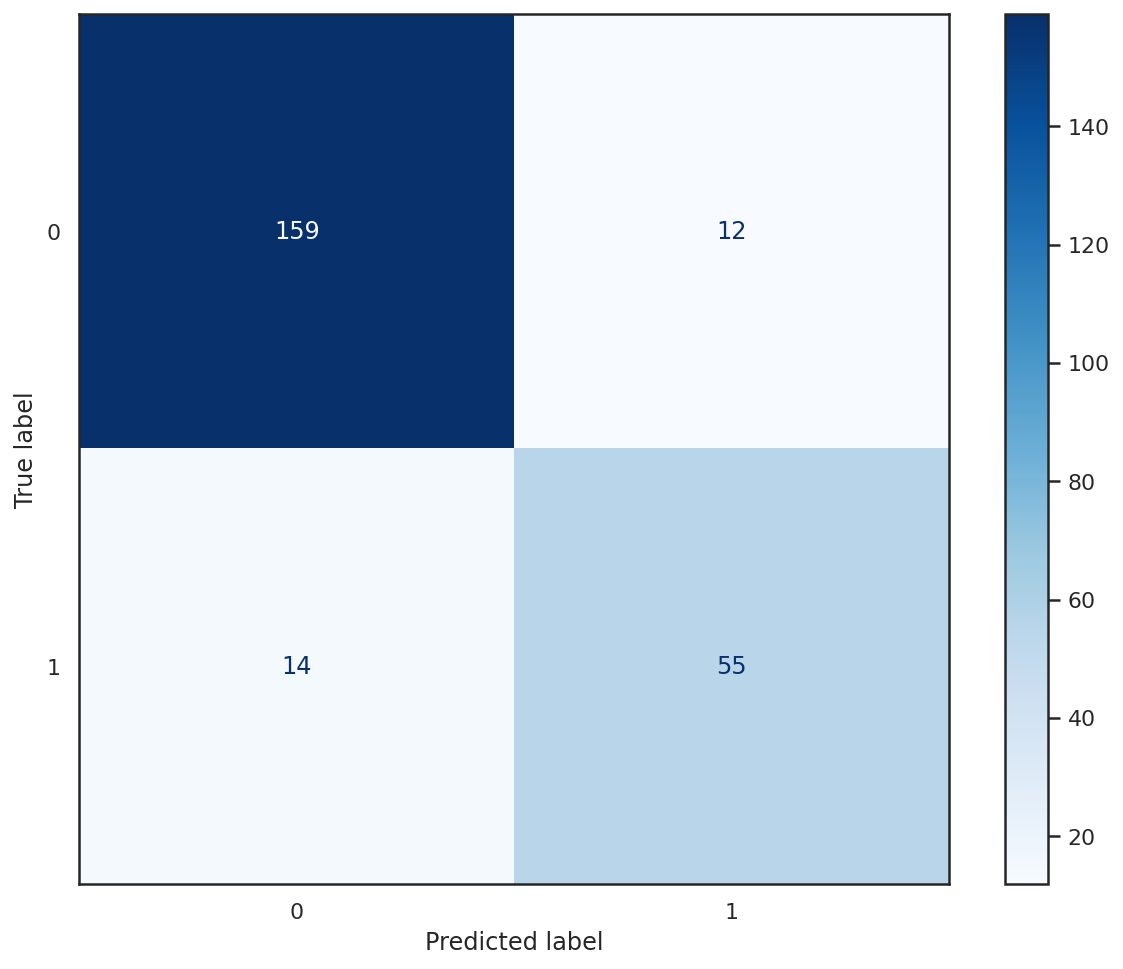

In [27]:
#Confusion matrix
plot_conf_mat(lr_model, x_train, y_train)

In [28]:
# Compute precision, recall and f1-score for the SGD classifier

print(classification_report(y_train, lr_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       171
           1       0.82      0.80      0.81        69

    accuracy                           0.89       240
   macro avg       0.87      0.86      0.87       240
weighted avg       0.89      0.89      0.89       240



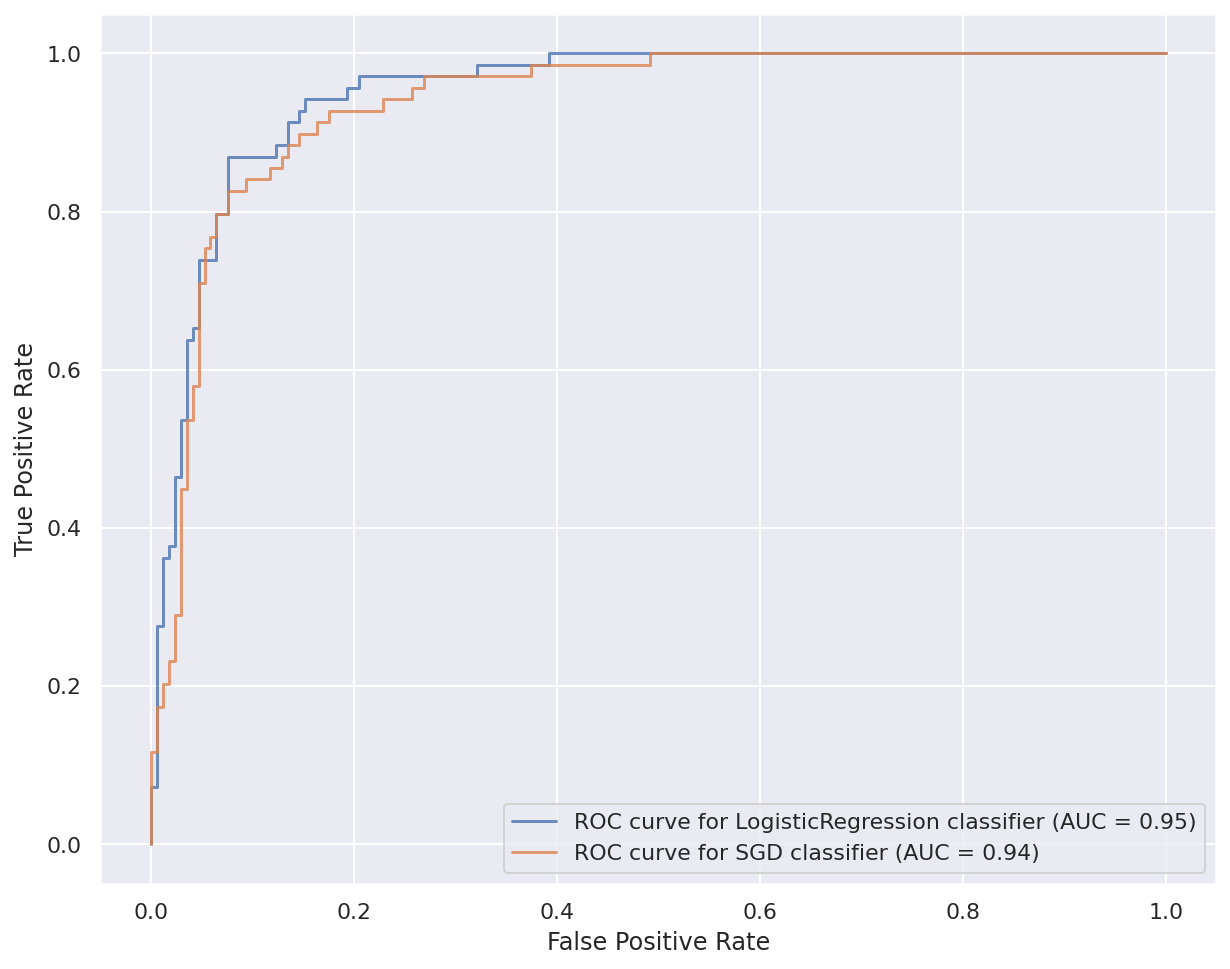

In [29]:
#ROC curve for classifier
ax = plt.gca()
lr_curve = plot_roc_curve(lr_model, x_train, y_train, name="ROC curve for LogisticRegression classifier", ax=ax, alpha=0.8)
sgd_curve.plot(ax=ax, alpha=0.8)
plt.show()